In [76]:
print("hello world!!")

hello world!!


In [124]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Importing Datset and converting them to dataframe

In [78]:
df_categories = pd.read_csv('dataset/categories.csv')
df_customers = pd.read_csv('dataset/customers.csv')
df_employee_territory= pd.read_csv('dataset/employee_territory.csv')
df_employees = pd.read_csv('dataset/employees.csv')
df_order_details = pd.read_csv('dataset/order_details.csv')
# parse dates so OrderDate/RequiredDate/ShippedDate are datetimes
df_orders = pd.read_csv('dataset/orders.csv', parse_dates=['OrderDate', 'RequiredDate', 'ShippedDate'])
df_products = pd.read_csv('dataset/products.csv')
df_region = pd.read_csv('dataset/region.csv')
df_shippers = pd.read_csv('dataset/shippers.csv')
df_suppliers = pd.read_csv('dataset/suppliers.csv')
df_territories = pd.read_csv('dataset/territories.csv')

In [79]:
df_categories.head(1)

,CategoryID,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"


In [80]:
df_customers.head(1)

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545


In [81]:
df_employee_territory.head(1)

,EmployeeID,TerritoryID
0,1,6897


In [82]:
df_employees.head(1)

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,Country,HomePhone,Salary,Unnamed: 13
0,1,Davolio,Nancy,Sales Representative,Ms.,12/08/1948 0:00,05/01/1992 0:00,507 - 20th Ave. E.Apt. 2A,Seattle,WA,USA,(206) 555-9857,2954.55,NaN


In [83]:
df_order_details.head(1)

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0,12,0


In [84]:
df_orders.head(1)

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,NaN,51100,France


In [85]:
df_products.head(1)

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0


In [86]:
df_region.head(1)

,RegionID,RegionDescription
0,1,Eastern ...


In [87]:
df_shippers.head(1)

,ShipperID,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831


In [88]:
df_suppliers.head(1)

,SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,NaN,EC1 4SD,UK,(171) 555-2222,NaN,NaN


In [89]:
df_territories.head(1)

,TerritoryID,TerritoryDescription,RegionID
0,1581,Westboro ...,1


for customer analysis:
df_customers, df_orders, df_order_details<br>
recency frequency monetary

In [90]:
df_customers.head()

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitucin 2222,Mxico D.F.,NaN,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquera,Antonio Moreno,Owner,Mataderos 2312,Mxico D.F.,NaN,05023,Mexico,(5) 555-3932,NaN
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbkp,Christina Berglund,Order Administrator,Berguvsvgen 8,Lule,NaN,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [91]:
df_orders.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitten,Luisenstr. 48,Mnster,NaN,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Pao, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprmes dlices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [92]:
df_order_details.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0,12,0
1,10248,42,9.8,10,0
2,10248,72,34.8,5,0
3,10249,14,18.6,9,0
4,10249,51,42.4,40,0


Adding a Line Sale column to df_order_details

In [93]:
df_order_details_copy1 = df_order_details.copy()

In [94]:
df_order_details_copy1['TotalLineSale'] = df_order_details['UnitPrice'] * df_order_details['Quantity']

In [95]:
df_order_details_copy1.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount,TotalLineSale
0,10248,11,14.0,12,0,168.0
1,10248,42,9.8,10,0,98.0
2,10248,72,34.8,5,0,174.0
3,10249,14,18.6,9,0,167.4
4,10249,51,42.4,40,0,1696.0


Creating an aggregated dataframe that conatains distinct order id, total order amount and total quantity ordered 

In [96]:
df_order_details_copy1_agg = df_order_details_copy1.groupby('OrderID').agg(
    OrderQuantity = ('Quantity', 'sum'),
    OrderSale = ('TotalLineSale', 'sum')
)
df_order_details_copy1_agg.head()

,OrderQuantity,OrderSale
OrderID,,
10248,27,440.0
10249,49,1863.4
10250,60,1813.0
10251,41,670.8
10252,105,3730.0


In [97]:
merged_df = pd.merge(
    df_order_details_copy1_agg,
    df_orders[['OrderID','CustomerID', 'OrderDate']],
    on='OrderID',
    how='left'
)

In [98]:
merged_df

,OrderID,OrderQuantity,OrderSale,CustomerID,OrderDate
0,10248,27,440.0,VINET,1996-07-04
1,10249,49,1863.4,TOMSP,1996-07-05
2,10250,60,1813.0,HANAR,1996-07-08
3,10251,41,670.8,VICTE,1996-07-08
4,10252,105,3730.0,SUPRD,1996-07-09
...,...,...,...,...,...
825,11073,30,300.0,PERIC,1998-05-05
826,11074,14,244.3,SIMOB,1998-05-06
827,11075,42,586.0,RICSU,1998-05-06
828,11076,50,1057.0,BONAP,1998-05-06


rfm analysis for customers 

groupby customer id fro analysis

In [99]:
agg_df = merged_df.groupby('CustomerID').agg(
    cus_sales = ('OrderSale', 'sum'),
    cus_quantity = ('OrderQuantity', 'sum'),
    frequency = ('OrderID', 'nunique'),
    latest_date = ('OrderDate', 'max')
)

In [100]:
agg_df

,cus_sales,cus_quantity,frequency,latest_date
CustomerID,,,,
ALFKI,4596.20,174,6,1998-04-09
ANATR,1402.95,63,4,1998-03-04
ANTON,7515.35,359,7,1998-01-28
AROUT,13806.50,650,13,1998-04-10
BERGS,26968.15,1001,18,1998-03-04
...,...,...,...,...
WARTH,16617.10,737,15,1998-04-15
WELLI,6480.70,267,9,1998-03-09
WHITC,29073.45,1063,14,1998-05-01


In [101]:
specified_date = pd.to_datetime('1999-01-01')
agg_df['Recency'] = (specified_date - agg_df['latest_date']).dt.days
agg_df

,cus_sales,cus_quantity,frequency,latest_date,Recency
CustomerID,,,,,
ALFKI,4596.20,174,6,1998-04-09,267
ANATR,1402.95,63,4,1998-03-04,303
ANTON,7515.35,359,7,1998-01-28,338
AROUT,13806.50,650,13,1998-04-10,266
BERGS,26968.15,1001,18,1998-03-04,303
...,...,...,...,...,...
WARTH,16617.10,737,15,1998-04-15,261
WELLI,6480.70,267,9,1998-03-09,298
WHITC,29073.45,1063,14,1998-05-01,245


In [102]:
rfm = agg_df.copy()

In [103]:
rfm

,cus_sales,cus_quantity,frequency,latest_date,Recency
CustomerID,,,,,
ALFKI,4596.20,174,6,1998-04-09,267
ANATR,1402.95,63,4,1998-03-04,303
ANTON,7515.35,359,7,1998-01-28,338
AROUT,13806.50,650,13,1998-04-10,266
BERGS,26968.15,1001,18,1998-03-04,303
...,...,...,...,...,...
WARTH,16617.10,737,15,1998-04-15,261
WELLI,6480.70,267,9,1998-03-09,298
WHITC,29073.45,1063,14,1998-05-01,245


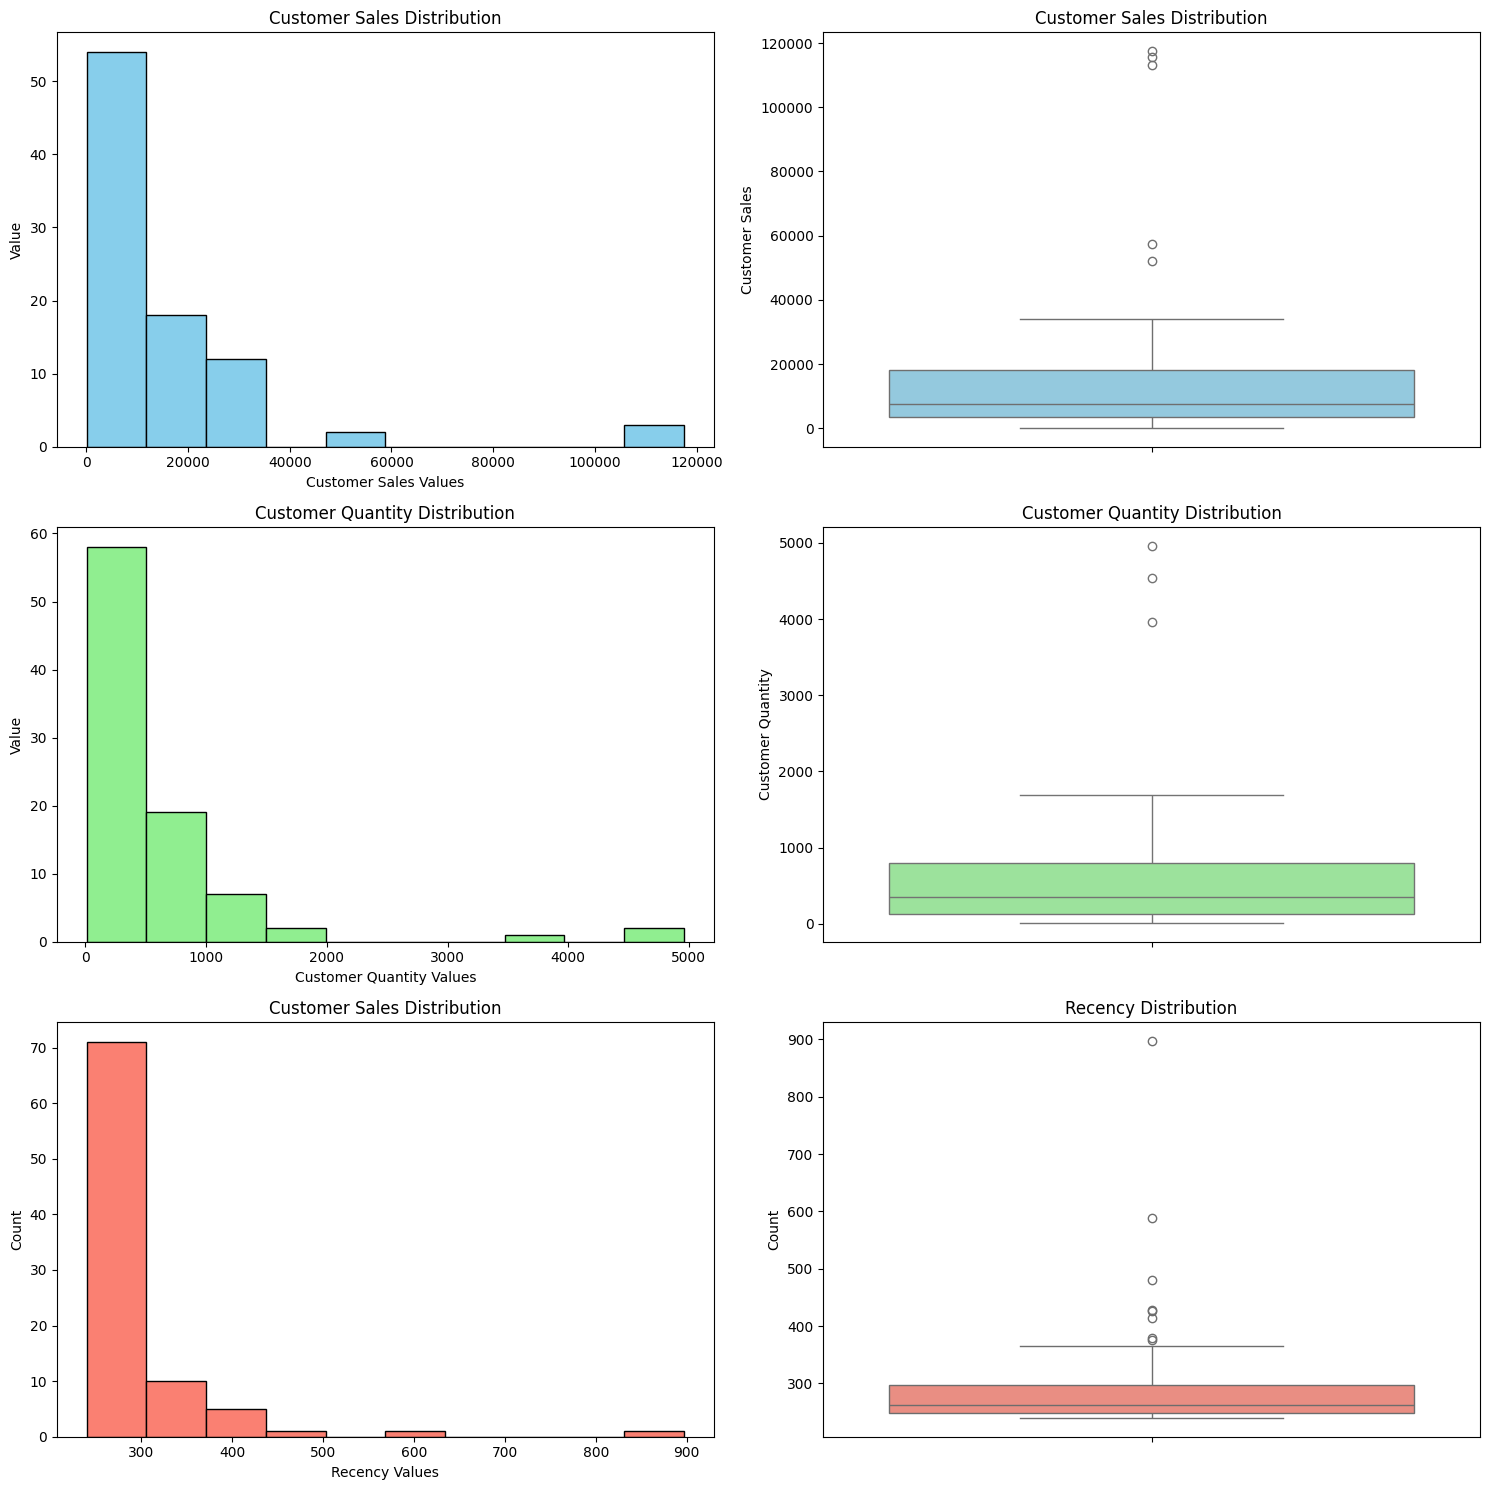

In [111]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.hist(rfm['cus_sales'], bins=10, color='skyblue', edgecolor='black')
plt.title('Customer Sales Distribution')
plt.xlabel('Customer Sales Values')
plt.ylabel('Value')

plt.subplot(3,2,2)
sns.boxplot(rfm['cus_sales'], color='skyblue')
plt.title('Customer Sales Distribution')
plt.ylabel('Customer Sales')

plt.subplot(3,2,3)
plt.hist(rfm['cus_quantity'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Customer Quantity Distribution')
plt.xlabel('Customer Quantity Values')
plt.ylabel('Value')

plt.subplot(3,2,4)
sns.boxplot(rfm['cus_quantity'], color='lightgreen')
plt.title('Customer Quantity Distribution')
plt.ylabel('Customer Quantity')

plt.subplot(3,2,5)
plt.hist(rfm['Recency'], bins=10, color='salmon', edgecolor='black')
plt.title('Customer Sales Distribution')
plt.xlabel('Recency Values')
plt.ylabel('Count')

plt.subplot(3,2,6)
sns.boxplot(rfm['Recency'], color='salmon')
plt.title('Recency Distribution')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

iqr analysis

In [105]:
sales_q1 = rfm['cus_sales'].quantile(0.25)
sales_q3 = rfm['cus_sales'].quantile(0.75)
sales_iqr = sales_q3 - sales_q1

print(sales_q1)
print(sales_q3)
print(sales_iqr)

3361.0
18138.45
14777.45


In [106]:
sales_outlier_df = rfm[(rfm['cus_sales'] > (sales_q3 + 1.5 * sales_iqr)) | (rfm['cus_sales'] < (sales_q1 - 1.5 * sales_iqr))]

In [107]:
f_q1 = rfm['frequency'].quantile(0.25)
f_q3 = rfm['frequency'].quantile(0.75)
f_iqr = f_q3 - f_q1

print(f_q1)
print(f_q3)
print(f_iqr)

5.0
12.0
7.0


In [108]:
fr_outliers_df = rfm[(rfm['frequency'] > (f_q3 + 1.5 * f_iqr)) | (rfm['frequency'] < (f_q1 - 1.5 * f_iqr))]

In [109]:
non_outliers_df = rfm[(~rfm['cus_sales'].index.isin(sales_outlier_df.index)) & (~rfm['frequency'].index.isin(fr_outliers_df.index))]

In [110]:
non_outliers_df

,cus_sales,cus_quantity,frequency,latest_date,Recency
CustomerID,,,,,
ALFKI,4596.20,174,6,1998-04-09,267
ANATR,1402.95,63,4,1998-03-04,303
ANTON,7515.35,359,7,1998-01-28,338
AROUT,13806.50,650,13,1998-04-10,266
BERGS,26968.15,1001,18,1998-03-04,303
...,...,...,...,...,...
WARTH,16617.10,737,15,1998-04-15,261
WELLI,6480.70,267,9,1998-03-09,298
WHITC,29073.45,1063,14,1998-05-01,245


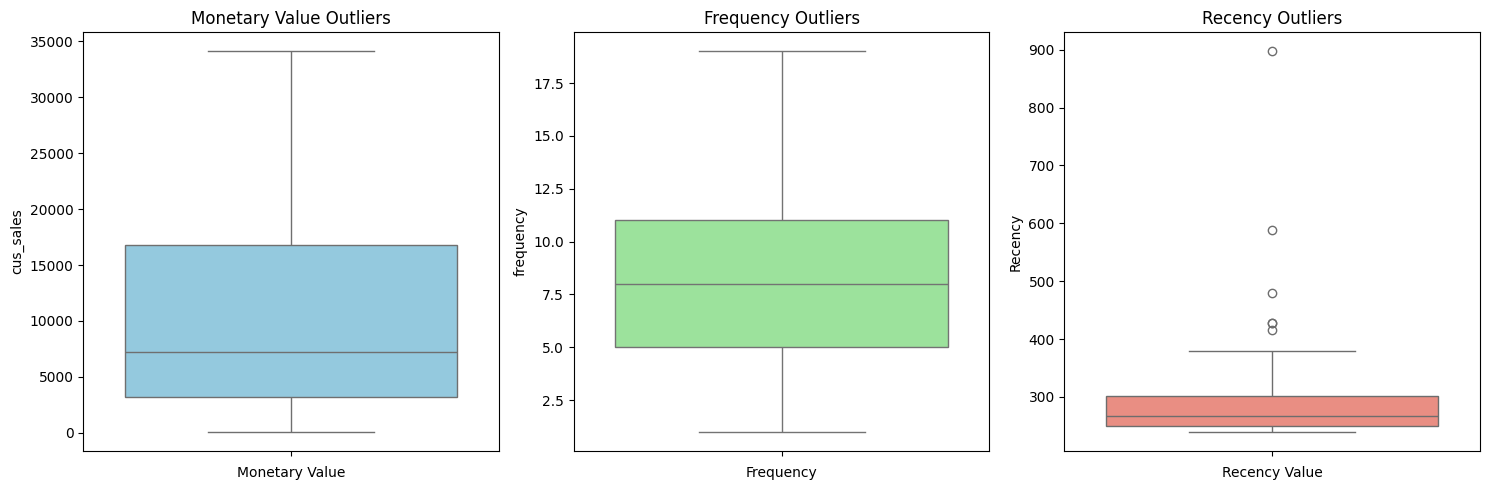

In [112]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(non_outliers_df['cus_sales'], color='skyblue')
plt.title('Monetary Value Outliers')
plt.xlabel('Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(non_outliers_df['frequency'], color='lightgreen')
plt.title('Frequency Outliers')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(non_outliers_df['Recency'], color='salmon')
plt.title('Recency Outliers')
plt.xlabel('Recency Value')

plt.tight_layout()
plt.show()

In [113]:
non_outliers_df.describe()

,cus_sales,cus_quantity,frequency,latest_date,Recency
count,84.000000,84.000000,84.000000,84,84.000000
mean,10696.450476,414.142857,8.380952,1998-03-12 18:34:17.142857088,294.226190
min,100.800000,11.000000,1.000000,1996-07-18 00:00:00,240.000000
25%,3222.890000,129.500000,5.000000,1998-03-05 18:00:00,249.000000
50%,7231.085000,323.500000,8.000000,1998-04-09 12:00:00,266.500000
75%,16775.862500,652.500000,11.000000,1998-04-27 00:00:00,301.250000
max,34101.150000,1525.000000,19.000000,1998-05-06 00:00:00,897.000000
std,9434.368485,354.258028,4.225296,NaN,89.346941


# <font color ="white">Scaling the Data

In [118]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[['cus_sales', 'frequency', 'Recency']])
scaled_data

array([[-6.50482219e-01, -5.66883951e-01, -3.06554563e-01],
       [-9.90985015e-01, -1.04306647e+00,  9.87891182e-02],
       [-3.39207268e-01, -3.28792691e-01,  4.92873253e-01],
       [ 3.31630959e-01,  1.09975486e+00, -3.17814110e-01],
       [ 1.73508469e+00,  2.29021116e+00,  9.87891182e-02],
       [-7.95117933e-01, -3.28792691e-01, -5.31745498e-01],
       [ 8.94808136e-01,  6.23572346e-01,  6.73026001e-01],
       [-5.75669172e-01, -1.28115773e+00, -1.26401816e-01],
       [ 1.40269126e+00,  2.05211990e+00, -6.10562325e-01],
       [ 1.27012096e+00,  1.33784612e+00, -4.75447764e-01],
       [-4.91205925e-01,  3.85481087e-01, -3.62852297e-01],
       [-9.47068605e-01, -5.66883951e-01, -5.20485951e-01],
       [-1.12983594e+00, -1.75734025e+00,  6.78695987e+00],
       [ 2.33508146e-01, -9.07014321e-02, -4.52928671e-01],
       [-7.34236363e-01, -8.04975210e-01, -4.52928671e-01],
       [-9.57273292e-01, -1.28115773e+00,  5.49170987e-01],
       [-7.39305651e-01, -5.66883951e-01

In [119]:
scaled_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=('Monetary', 'Frequncy', 'Recency'))
scaled_df

,Monetary,Frequncy,Recency
CustomerID,,,
ALFKI,-0.650482,-0.566884,-0.306555
ANATR,-0.990985,-1.043066,0.098789
ANTON,-0.339207,-0.328793,0.492873
AROUT,0.331631,1.099755,-0.317814
BERGS,1.735085,2.290211,0.098789
...,...,...,...
WARTH,0.631331,1.575937,-0.374112
WELLI,-0.449534,0.147390,0.042491
WHITC,1.959577,1.337846,-0.554265


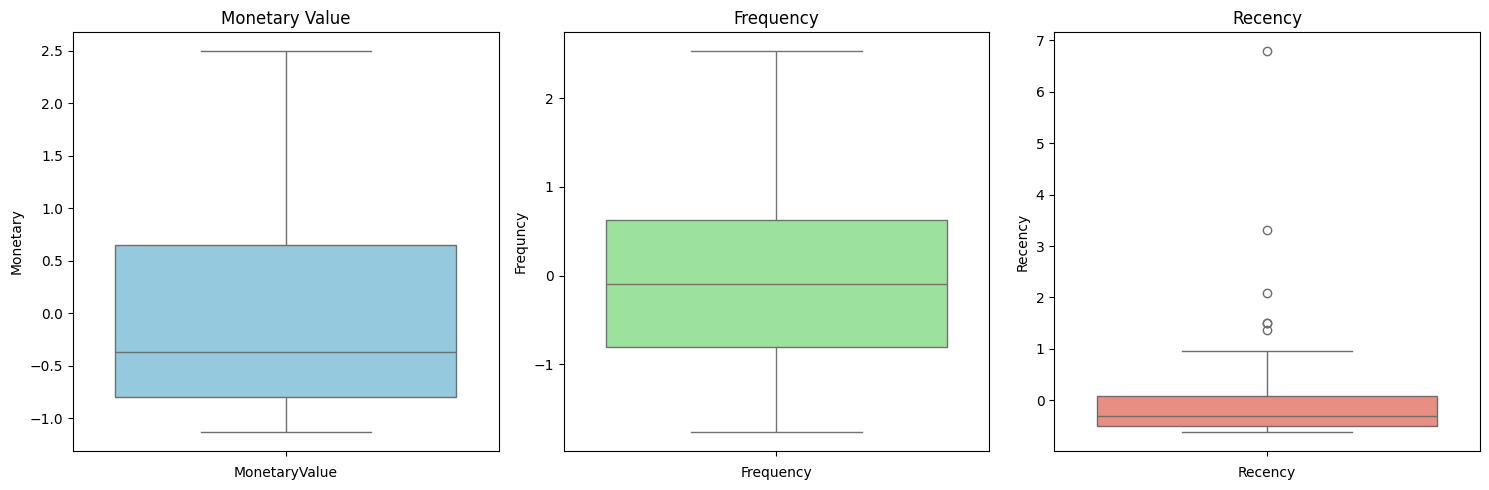

In [122]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(scaled_df['Monetary'], color='skyblue')
plt.title('Monetary Value')
plt.xlabel('MonetaryValue')

plt.subplot(1,3,2)
sns.boxplot(scaled_df['Frequncy'], color='lightgreen')
plt.title('Frequency')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(scaled_df['Recency'], color='salmon')
plt.title('Recency')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

# <font color = "white">K-Means Clustering

In [126]:
max_k = 12
inertia = []
silhoulette_score_ar = []
for k in range(2, max_k+1):
    model = KMeans(n_clusters=k, max_iter=1000, random_state=42)
    cluster_labels = model.fit_predict(scaled_df)
    inertia.append(model.inertia_)
    sil_score = silhouette_score(scaled_df, cluster_labels)
    silhoulette_score_ar.append(sil_score)

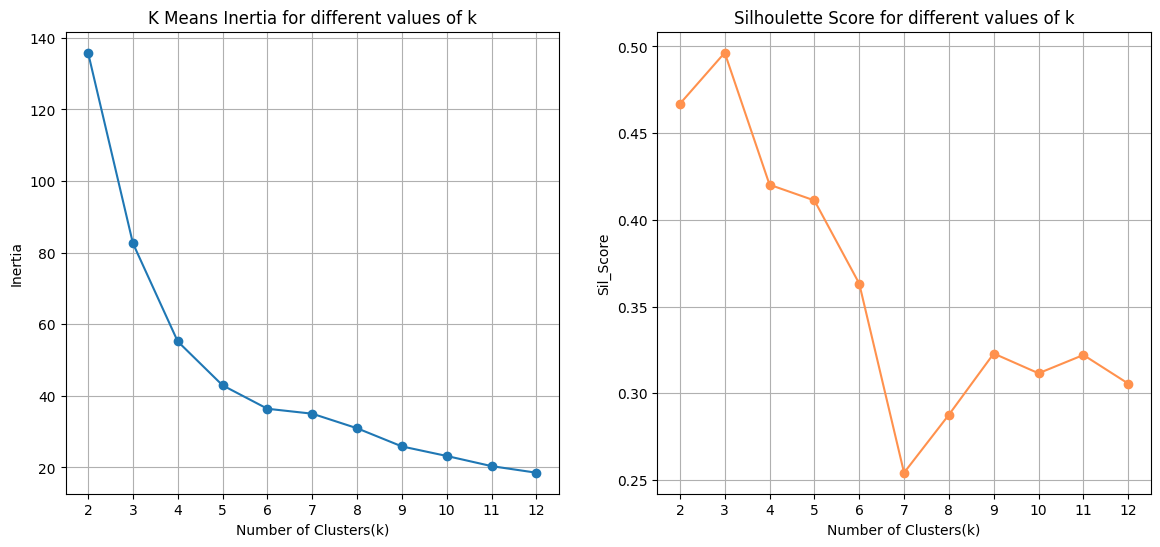

In [127]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(range(2, max_k+1), inertia, marker='o')
plt.title('K Means Inertia for different values of k')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.xticks(range(2,max_k+1))
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(range(2, max_k+1), silhoulette_score_ar, marker='o', color = '#FF914D')
plt.title('Silhoulette Score for different values of k')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sil_Score')
plt.xticks(range(2,max_k+1))
plt.grid(True)

plt.show()

In [128]:
kmeans = KMeans(n_clusters=6, max_iter=1000, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)
print(cluster_labels)

[5 5 1 3 0 5 3 5 0 3 1 5 2 1 5 5 5 5 1 4 4 0 0 5 5 1 5 1 1 3 4 0 0 4 1 0 5
 3 4 4 3 5 3 3 1 1 1 0 5 5 5 3 1 5 3 5 1 0 5 1 1 3 5 5 1 1 5 1 3 5 5 5 1 5
 4 3 1 4 1 3 1 0 5 5]


In [129]:
non_outliers_df['Cluster'] = cluster_labels
non_outliers_df

/var/folders/p0/_bzvcc_50zq0rsj23x4gfbm00000gp/T/ipykernel_19366/395619450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


,cus_sales,cus_quantity,frequency,latest_date,Recency,Cluster
CustomerID,,,,,,
ALFKI,4596.20,174,6,1998-04-09,267,5
ANATR,1402.95,63,4,1998-03-04,303,5
ANTON,7515.35,359,7,1998-01-28,338,1
AROUT,13806.50,650,13,1998-04-10,266,3
BERGS,26968.15,1001,18,1998-03-04,303,0
...,...,...,...,...,...,...
WARTH,16617.10,737,15,1998-04-15,261,3
WELLI,6480.70,267,9,1998-03-09,298,1
WHITC,29073.45,1063,14,1998-05-01,245,0


Text(0.5, 0, 'Recency')

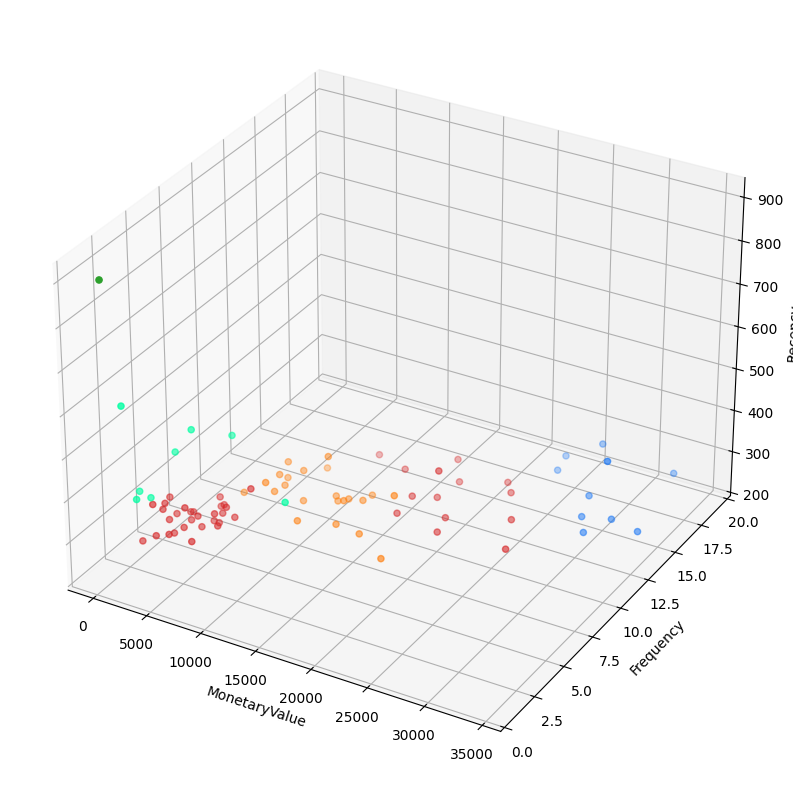

In [132]:
cluster_colors = {
    0 : '#1b77f4',
    1 : '#ff7f0e',
    2 : '#2ca02c',
    3 : '#d62728',
    4 : "#00ffa2",
    5 : '#d62728'
}
colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(non_outliers_df['cus_sales'],
                     non_outliers_df['frequency'],
                     non_outliers_df['Recency'],
                     c = colors,
                     marker='o'
)

ax.set_xlabel('MonetaryValue')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')